# Exercise: Dimensionality Reduction and Clustering



(1) Use PCA to reduce the dimension of the cancer dataset, then apply supervised learning (logistic regression) using two principle components only. Steps:
    
    (a) Scale the data using StandardScaler (zero mean and unit variance variables), then apply PCA to the scaled training data using two principle components. Print the shape of the training data before and after PCA is applied.
    
    (c) Print the variance explained by each of the two principle components
    
    (b) Use the two principle components to fit a logistic regression model with regularization parameter c=10. Find the accuracy. Compare it to the accuracy when all the original features (30 features) are used to fit the logistic regression model.

(2) Assume we do not know the actual labels, and use clustering algorithms on the training samples using the two derived principle components only.

    (a) Apply K-means with random_state=0, and K=2. Use scatter plot to visualize the output of K-Means clustering algorithm. (x-axis is first principle component and y-axis is the second principle component). Also plot the actual labels.
    
    (b) Use the actual labels of Y_train to find the K-means clustering score using the adjusted_rand_score
    
    (c) Find the adjusted_rand_score if we used agglomerative clustering setting number of clusters to 2, using default linkage (Ward). 
  

In [29]:
% matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering



cancer = load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data,cancer.target,random_state=0)


<h2>1a</h2>

In [30]:
#Scaling the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
#PCA
print("Training data shape before PCA", X_train.shape)
print("Test data shape before PCA", X_test.shape)
N_components=2 # Define the number of principle components
Data_pca = PCA(n_components=N_components).fit(X_train_scaled)
X_train_pca = Data_pca.transform(X_train_scaled)
X_test_pca = Data_pca.transform(X_test_scaled)
print("Training data shape after PCA", X_train_pca.shape)
print("Test data shape after PCA", X_test_pca.shape)

Training data shape before PCA (426, 30)
Test data shape before PCA (143, 30)
Training data shape after PCA (426, 2)
Test data shape after PCA (143, 2)


<h2>1c</h2>

In [31]:
print('Explained variance,' , Data_pca.explained_variance_ratio_)

Explained variance, [ 0.43315126  0.19586506]


<h2>1b</h2>

In [32]:
logregmodel = LogisticRegression(penalty='l1', C=10).fit(X_train,Y_train)
logregmodelpca = LogisticRegression(penalty='l1', C=10).fit(X_train_pca,Y_train)
Y_preditcted = logregmodel.predict(X_test)
Y_preditctedpca = logregmodelpca.predict(X_test_pca)
print("Accuracy without PCA", logregmodel.score(X_test,Y_test))
print("Accuracy with PCA", logregmodelpca.score(X_test_pca,Y_test))

Accuracy without PCA 0.972027972028
Accuracy with PCA 0.951048951049


<h2>2a</h2>

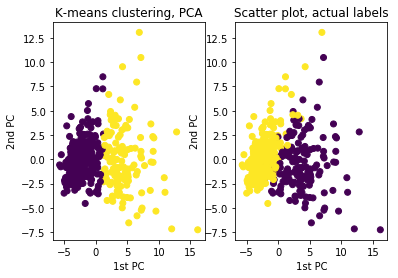

In [33]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train_pca)
plt.subplot(121)
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c = kmeans.labels_)
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
plt.title("K-means clustering, PCA")

plt.subplot(122)
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c = Y_train)
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
plt.title("Scatter plot, actual labels")

<h2>2b</h2>

In [34]:
print("K-Means score: ", adjusted_rand_score(Y_train,kmeans.labels_))

K-Means score:  0.671563432951


<h2>2c</h2>

In [35]:
agglomodel = AgglomerativeClustering(linkage='ward',n_clusters=2).fit(X_train_pca)
print("Agglomerative clustering score: ", adjusted_rand_score(Y_train,agglomodel.labels_))

Agglomerative clustering score:  0.617995956791
